# Wholesale Customers Analysis

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import os
from scipy.stats import variation

In [3]:
df = pd.read_csv('Wholesale Customer.csv') 

In [4]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


#### Checking the data types /information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [6]:
# Check for missing value in any colum
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [7]:
df.shape

(440, 9)

In [9]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.50,127.16,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.30,12647.33,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.27,7380.38,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.28,9503.16,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.93,4854.67,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.49,4767.85,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.87,2820.11,3.0,408.25,965.5,1820.25,47943.0


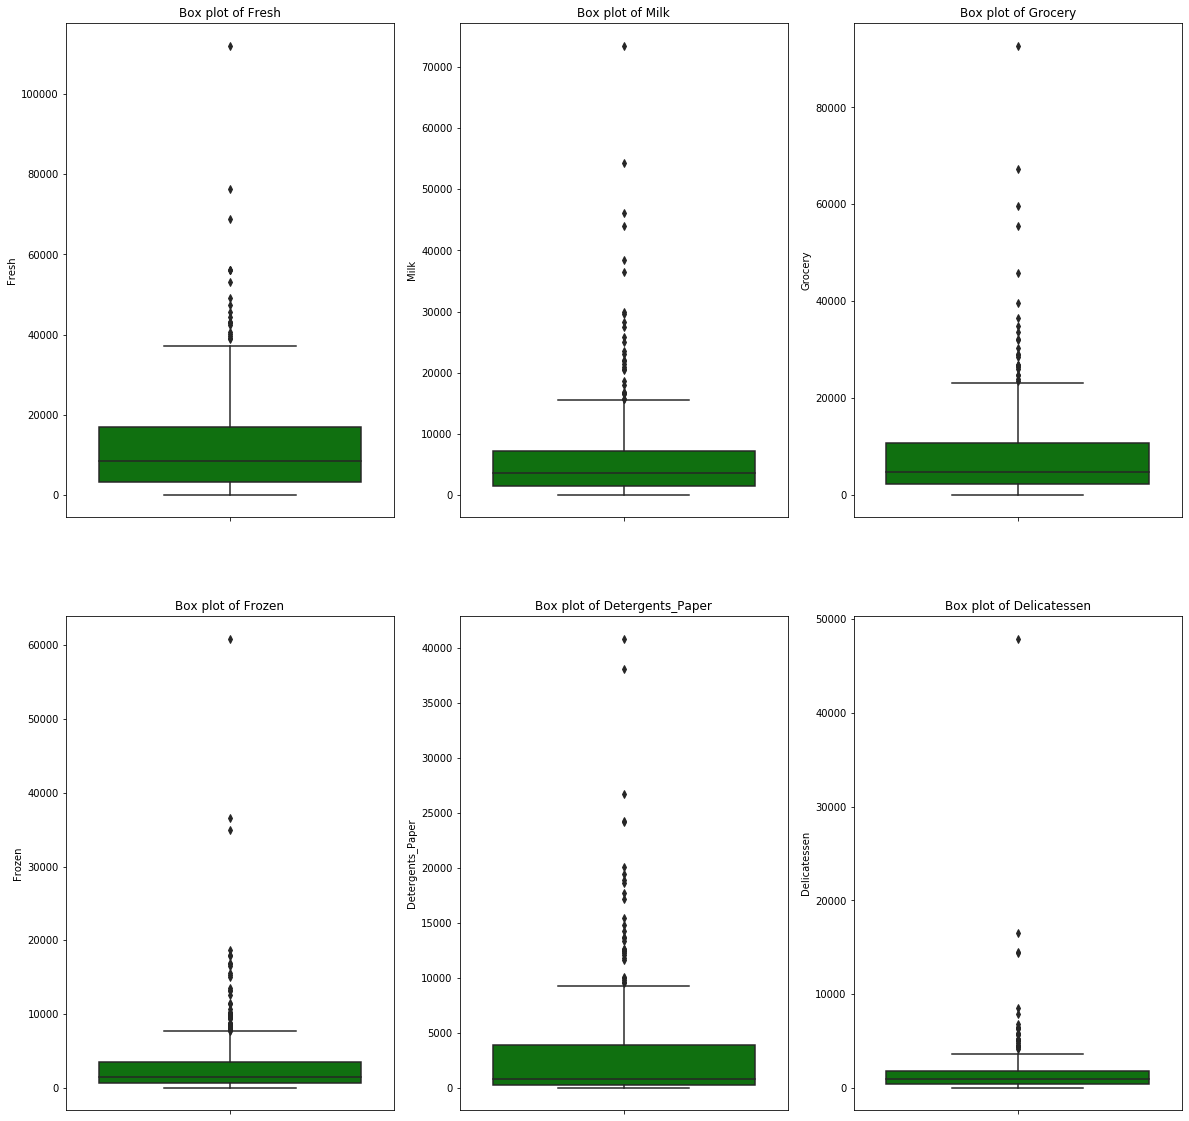

In [10]:
# Checking for Outliers
plt.figure(figsize= (20,20))
box_plot_no=1
for col in df.columns :
    if (col != 'Channel') and (col != 'Region') and (col != 'Buyer/Spender'):
        box_plot_title = "Box plot of " + col
        plt.subplot(2,3,box_plot_no)
        sns.boxplot(x= col,data =df ,color='green', orient = 'v').set(title =box_plot_title)
        box_plot_no = box_plot_no + 1 

As evident from above box plots, all attributes have outliers. All outliers are on maximum side i.e. there are few retailers which are spending much more than the majority of the retailers. Data appears to be right skewed

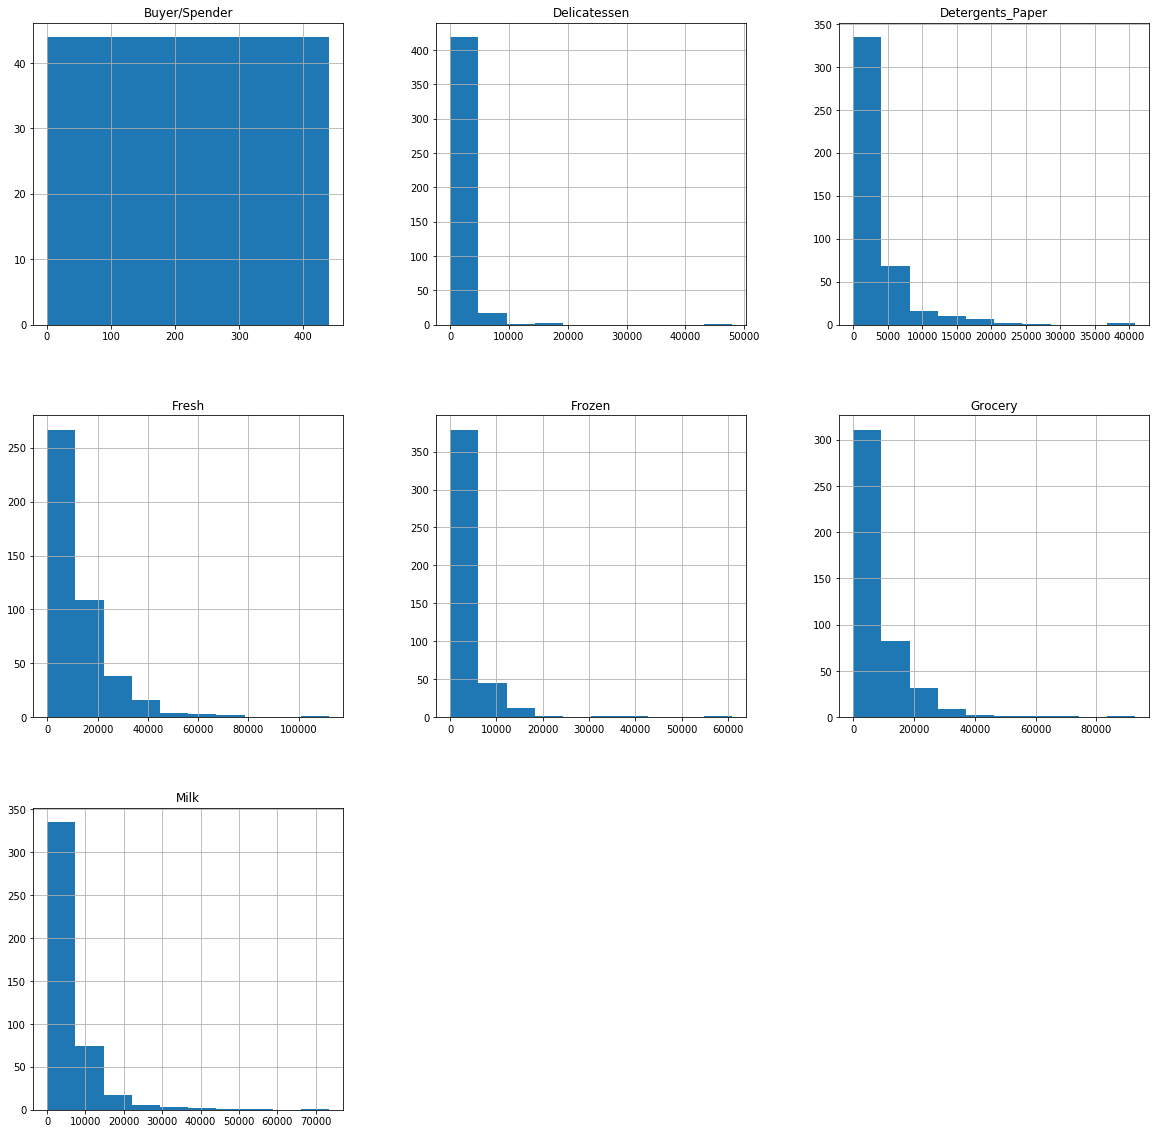

In [11]:
#Plots to see the distribution of the continuous features individually
df.hist(figsize=(20,20))
plt.show()

These histograms confirms that few high spender buyer are causing the data to be right/positve skewed.

### 1.1) Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?
### Solution:

Summary statistics is already present in the EDA done above

In [12]:
# adding a Total spend column in data 
df["Total_Spend"] = df["Fresh"] + df["Milk"] + df["Grocery"] + df["Frozen"] + df["Detergents_Paper"] + df["Delicatessen"]
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spend
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [13]:
# creating a pivot based on Region
dfa=pd.DataFrame(pd.pivot_table(df,index=['Region'],aggfunc=sum))
dfa.sort_values(by='Total_Spend',inplace=True,ascending=False)
dfa

,Buyer/Spender,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total_Spend
Region,,,,,,,,
Other,64026,512110,890410,3960577,930492,2495251,1888759,10677599
Lisbon,18095,104327,204136,854833,231026,570037,422454,2386813
Oporto,14899,54506,173311,464721,190132,433274,239144,1555088


In [14]:
first_row_index=0;
last_row_index=dfa.shape[0]-1;
#dfa.index[last_row_index]
print ('Region spending highest is {} and lowest is {}'.format(dfa.index[first_row_index],dfa.index[last_row_index]))

Region spending highest is Other and lowest is Oporto


We can concluded that 'Other' region is the highest spender. It seems like the obvious one because as seen in our EDA, 75% data is coming from Other category. Further we can see that lowest spenders are in 'Opporto' region

In [15]:
# creating a pivot based on Channel
dfb=pd.pivot_table(df,index=['Channel'],aggfunc=sum)
dfb.sort_values(by='Total_Spend',inplace=True,ascending=False)
dfb

,Buyer/Spender,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total_Spend
Channel,,,,,,,,
Hotel,71034,421955,235587,4015717,1116979,1180717,1028614,7999569
Retail,25986,248988,1032270,1264414,234671,2317845,1521743,6619931


In [16]:
first_row_index=0;
last_row_index=dfb.shape[0]-1;
#dfa.index[last_row_index]
print ('Channel spending highest is {} and lowest is {}'.format(dfb.index[first_row_index],dfb.index[last_row_index]))

Channel spending highest is Hotel and lowest is Retail


We can conclude that spending is highest under 'Hotel' channel as compared to 'Retail' channel.

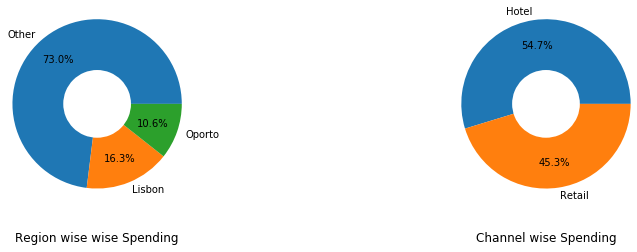

In [17]:
#creating a donut 
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,12)) 
ax1.pie(dfa["Total_Spend"],labels=dfa.index,autopct='%.1f%%',pctdistance=0.7,radius=2.5)
ax1.pie([1],colors=['w'],radius=1)

ax2.pie(dfb["Total_Spend"],labels=dfb.index,autopct='%.1f%%',pctdistance=0.7,radius=2.5)
ax2.pie([1],colors=['w'],radius=1)
ax1.title.set_position([.5, -1.2])
ax1.title.set_text("Region wise wise Spending")
ax2.title.set_position([.5, -1.2])
ax2.title.set_text("Channel wise Spending")
plt.tight_layout()

plt.show()

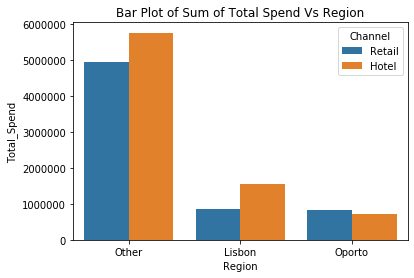

In [18]:
sns.barplot(x='Region', y ='Total_Spend' , hue='Channel',data=df,estimator=sum, ci=False ).set(title ="Bar Plot of Sum of Total Spend Vs Region");


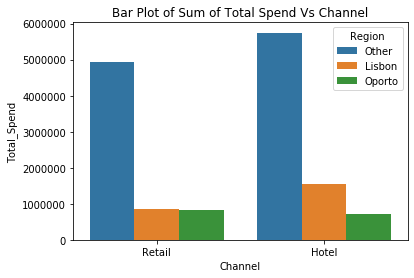

In [19]:
sns.barplot(x='Channel', y ='Total_Spend' , hue='Region',data=df,estimator=sum, ci=False ).set(title ="Bar Plot of Sum of Total Spend Vs Channel");


### 1.2) There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel? Provide justification for your answer
### Solution:

In [20]:
df_Other=df[df["Region"]=='Other']
df_Oporto=df[df["Region"]=='Oporto']
df_Lisbon=df[df["Region"]=='Lisbon']

In [22]:
# creating a function to return CV array
def CV_row(df):   
    i=0;
    CV=[]
    for i in df.columns:
        if (i != 'Channel') and (i != 'Region') and (i != 'Buyer/Spender') and (i != 'Total_Spend'):
            CV_val=  round(variation(df[i]),2)
            CV.append(CV_val)

    return CV    

In [23]:
# creating a function to return skew array
def Skew_row(df):   
    i=0;
    Skew=[]
    for i in df.columns:
        if (i != 'Channel') and (i != 'Region') and (i != 'Buyer/Spender') and (i != 'Total_Spend'):
            Skew_val=  round(df[i].skew(),2)
            Skew.append(Skew_val)

    return Skew    

In [24]:
df_Other_summ=pd.DataFrame(df_Other.describe().round(2))
df_Other_summ.loc["CV"]= CV_row(df_Other)
df_Other_summ.loc["Skew"]= Skew_row(df_Other)
df_Other_summ

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,316.00,316.00,316.00,316.00,316.00,316.00
mean,12533.47,5977.09,7896.36,2944.59,2817.75,1620.60
std,13389.21,7935.46,9537.29,4260.13,4593.05,3232.58
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,3350.75,1634.00,2141.50,664.75,251.25,402.00
50%,8752.50,3684.50,4732.00,1498.00,856.00,994.00
75%,17406.50,7198.75,10559.75,3354.75,3875.75,1832.75
max,112151.00,73498.00,92780.00,36534.00,40827.00,47943.00
CV,1.07,1.33,1.21,1.44,1.63,1.99
Skew,2.62,4.25,3.84,3.96,3.71,10.21


In [25]:
df_Oporto_summ=pd.DataFrame(df_Oporto.describe().round(2))
df_Oporto_summ.loc["CV"]= CV_row(df_Oporto)
df_Oporto_summ.loc["Skew"]= Skew_row(df_Oporto)
df_Oporto_summ

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,47.00,47.00,47.00,47.00,47.00,47.00
mean,9887.68,5088.17,9218.60,4045.36,3687.47,1159.70
std,8387.90,5826.34,10842.75,9151.78,6514.72,1050.74
min,3.00,333.00,1330.00,131.00,15.00,51.00
25%,2751.50,1430.50,2792.50,811.50,282.50,540.50
50%,8090.00,2374.00,6114.00,1455.00,811.00,898.00
75%,14925.50,5772.50,11758.50,3272.00,4324.50,1538.50
max,32717.00,25071.00,67298.00,60869.00,38102.00,5609.00
CV,0.84,1.13,1.16,2.24,1.75,0.90
Skew,0.98,1.80,3.64,5.49,3.62,2.15


In [26]:
df_Lisbon_summ=pd.DataFrame(df_Lisbon.describe().round(2))
df_Lisbon_summ.loc["CV"]= CV_row(df_Lisbon)
df_Lisbon_summ.loc["Skew"]= Skew_row(df_Lisbon)

df_Lisbon_summ

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,77.00,77.00,77.00,77.00,77.00,77.00
mean,11101.73,5486.42,7403.08,3000.34,2651.12,1354.90
std,11557.44,5704.86,8496.29,3092.14,4208.46,1345.42
min,18.00,258.00,489.00,61.00,5.00,7.00
25%,2806.00,1372.00,2046.00,950.00,284.00,548.00
50%,7363.00,3748.00,3838.00,1801.00,737.00,806.00
75%,15218.00,7503.00,9490.00,4324.00,3593.00,1775.00
max,56083.00,28326.00,39694.00,18711.00,19410.00,6854.00
CV,1.03,1.03,1.14,1.02,1.58,0.99
Skew,2.01,1.92,2.02,2.33,2.36,2.05


In [27]:
# creating a function to rename column names
def new_col_name(df_Other_summ,suffix):
    
    i=0;
    col_name=[]
    for i in df_Other_summ.columns:
        new_name=  str(i) + suffix
        col_name.append(new_name)
        #print (new_name)


    return col_name    

In [28]:
# renaming the cols and adding suffix
col_name=[]
col_name=new_col_name(df_Other_summ,"_Other")    
df_Other_summ.columns =   col_name  
col_name=new_col_name(df_Oporto_summ,"_Oporto")    
df_Oporto_summ.columns =   col_name  
col_name=new_col_name(df_Lisbon_summ,"_Lisbon")    
df_Lisbon_summ.columns =   col_name  

In [29]:
df_Regionwise_Fresh_summ=pd.concat((df_Other_summ["Fresh_Other"],df_Oporto_summ["Fresh_Oporto"],df_Lisbon_summ["Fresh_Lisbon"]),axis=1,sort=False)
df_Regionwise_Fresh_summ

,Fresh_Other,Fresh_Oporto,Fresh_Lisbon
count,316.00,47.00,77.00
mean,12533.47,9887.68,11101.73
std,13389.21,8387.90,11557.44
min,3.00,3.00,18.00
25%,3350.75,2751.50,2806.00
50%,8752.50,8090.00,7363.00
75%,17406.50,14925.50,15218.00
max,112151.00,32717.00,56083.00
CV,1.07,0.84,1.03
Skew,2.62,0.98,2.01


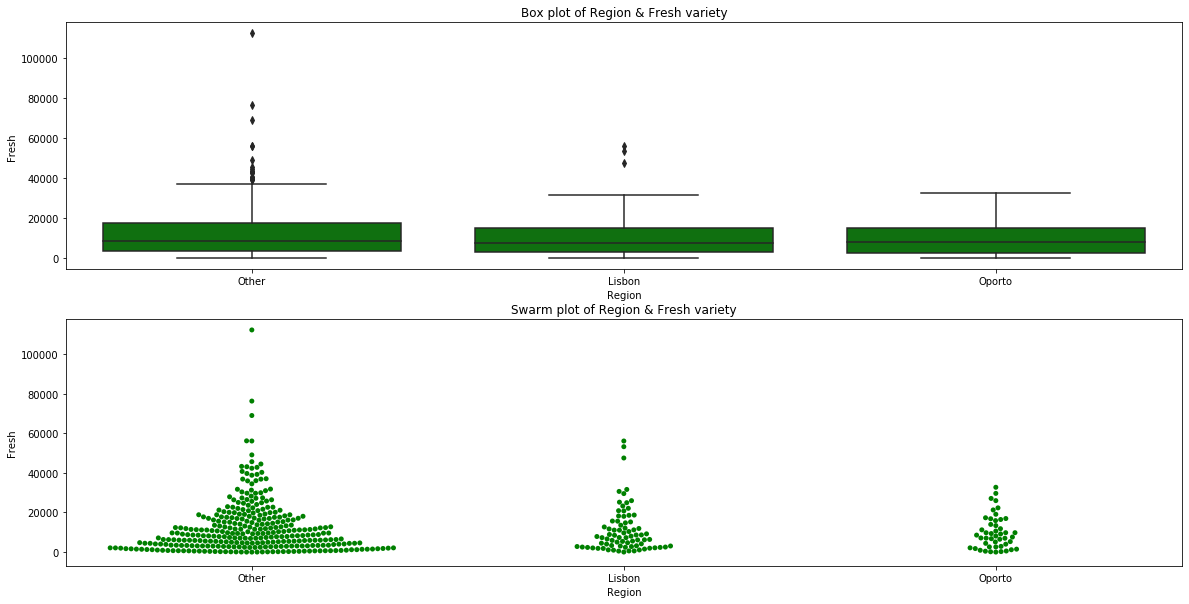

In [30]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Region & Fresh variety"
plt.subplot(2,1,1)
sns.boxplot(x="Region",y= "Fresh",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Region & Fresh variety"
sns.swarmplot(x="Region",y= "Fresh",data =df ,color='green').set(title =swarm_plot_title);


In [31]:
df_Regionwise_Milk_summ=pd.concat((df_Other_summ.Milk_Other,df_Oporto_summ.Milk_Oporto,df_Lisbon_summ.Milk_Lisbon),axis=1,sort=False)
df_Regionwise_Milk_summ

,Milk_Other,Milk_Oporto,Milk_Lisbon
count,316.00,47.00,77.00
mean,5977.09,5088.17,5486.42
std,7935.46,5826.34,5704.86
min,55.00,333.00,258.00
25%,1634.00,1430.50,1372.00
50%,3684.50,2374.00,3748.00
75%,7198.75,5772.50,7503.00
max,73498.00,25071.00,28326.00
CV,1.33,1.13,1.03
Skew,4.25,1.80,1.92


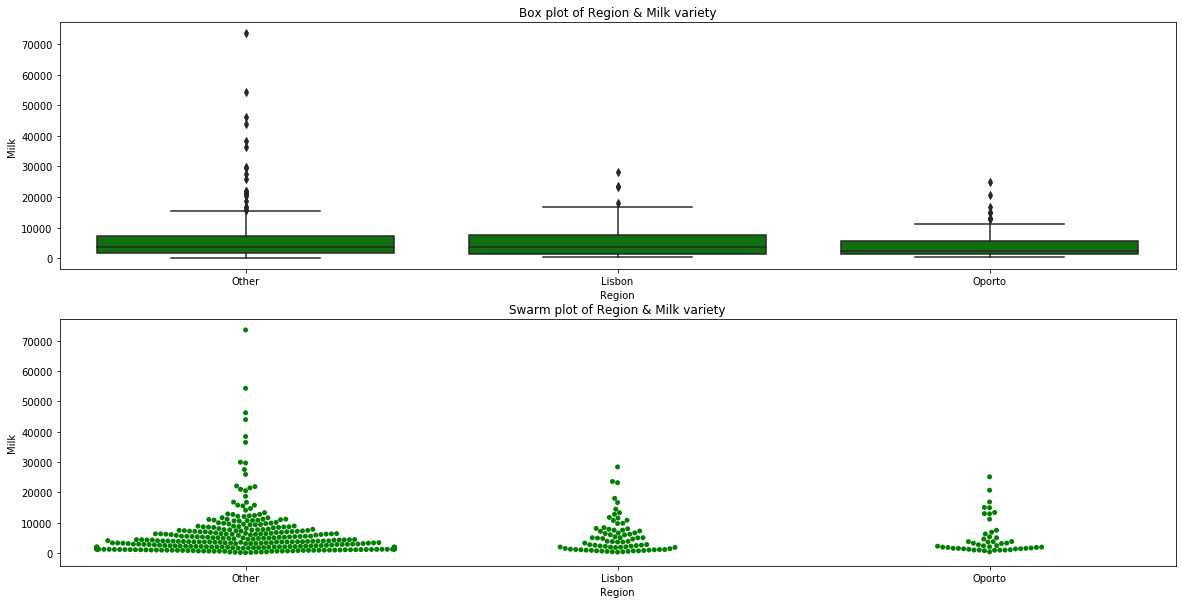

In [32]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Region & Milk variety"
plt.subplot(2,1,1)
sns.boxplot(x="Region",y= "Milk",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Region & Milk variety"
sns.swarmplot(x="Region",y= "Milk",data =df ,color='green').set(title =swarm_plot_title);

In [33]:
df_Regionwise_Grocery_summ=pd.concat((df_Other_summ.Grocery_Other,df_Oporto_summ.Grocery_Oporto,df_Lisbon_summ.Grocery_Lisbon),axis=1,sort=False)
df_Regionwise_Grocery_summ

,Grocery_Other,Grocery_Oporto,Grocery_Lisbon
count,316.00,47.00,77.00
mean,7896.36,9218.60,7403.08
std,9537.29,10842.75,8496.29
min,3.00,1330.00,489.00
25%,2141.50,2792.50,2046.00
50%,4732.00,6114.00,3838.00
75%,10559.75,11758.50,9490.00
max,92780.00,67298.00,39694.00
CV,1.21,1.16,1.14
Skew,3.84,3.64,2.02


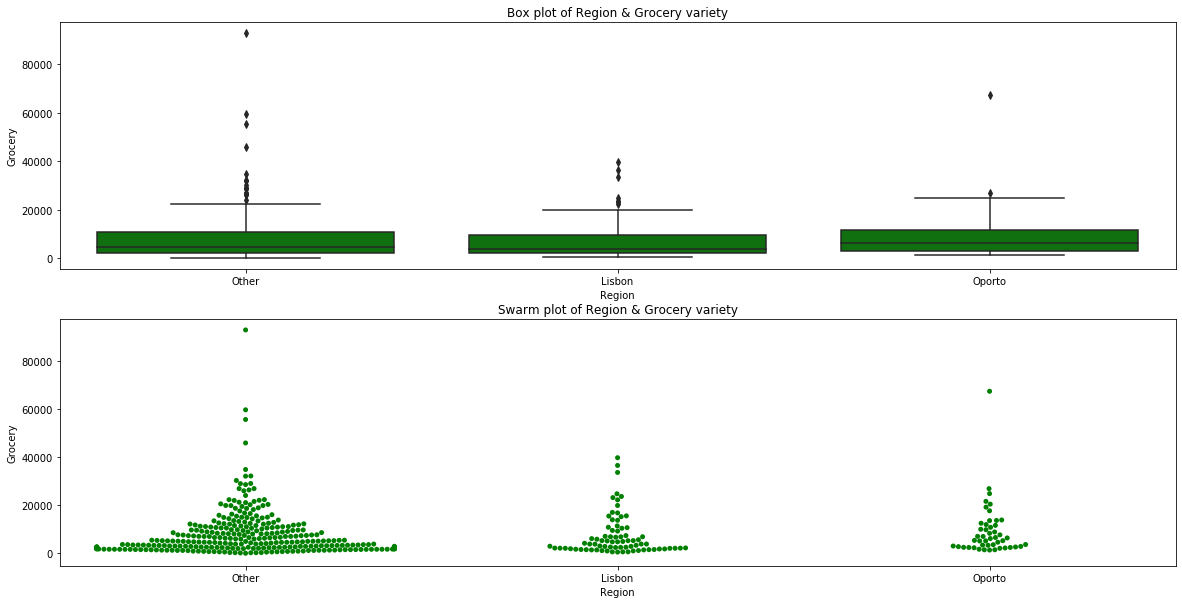

In [34]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Region & Grocery variety"
plt.subplot(2,1,1)
sns.boxplot(x="Region",y= "Grocery",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Region & Grocery variety"
sns.swarmplot(x="Region",y= "Grocery",data =df ,color='green').set(title =swarm_plot_title);


In [35]:
df_Regionwise_Frozen_summ=pd.concat((df_Other_summ.Frozen_Other,df_Oporto_summ.Frozen_Oporto,df_Lisbon_summ.Frozen_Lisbon),axis=1,sort=False)
df_Regionwise_Frozen_summ

,Frozen_Other,Frozen_Oporto,Frozen_Lisbon
count,316.00,47.00,77.00
mean,2944.59,4045.36,3000.34
std,4260.13,9151.78,3092.14
min,25.00,131.00,61.00
25%,664.75,811.50,950.00
50%,1498.00,1455.00,1801.00
75%,3354.75,3272.00,4324.00
max,36534.00,60869.00,18711.00
CV,1.44,2.24,1.02
Skew,3.96,5.49,2.33


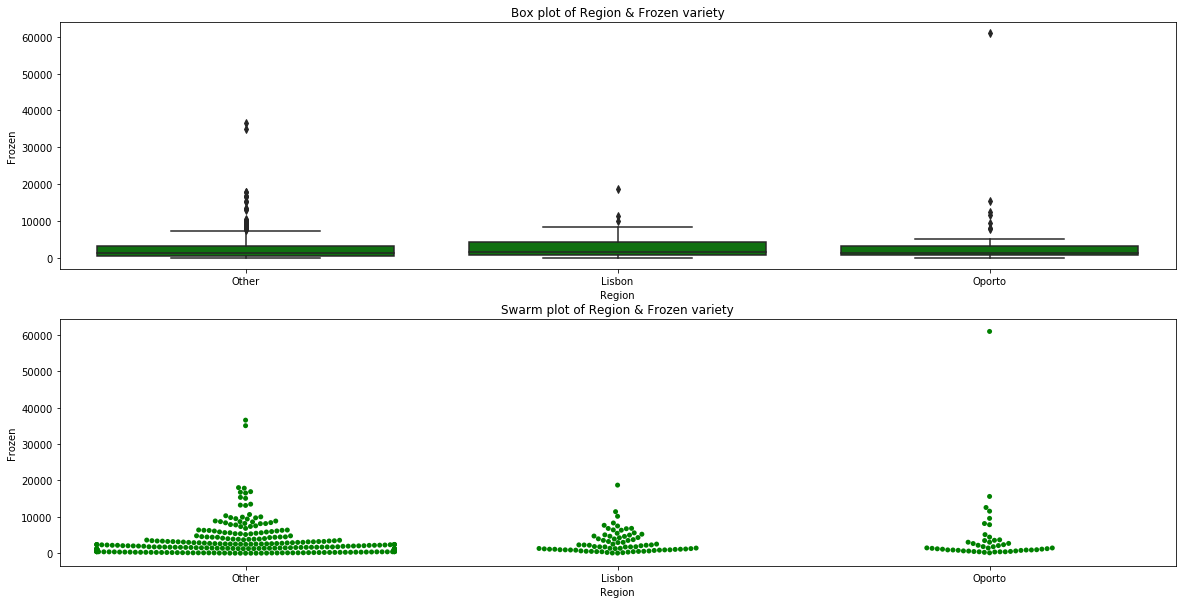

In [36]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Region & Frozen variety"
plt.subplot(2,1,1)
sns.boxplot(x="Region",y= "Frozen",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Region & Frozen variety"
sns.swarmplot(x="Region",y= "Frozen",data =df ,color='green').set(title =swarm_plot_title);

In [37]:
df_Regionwise_Delicatessen_summ=pd.concat((df_Other_summ.Delicatessen_Other,df_Oporto_summ.Delicatessen_Oporto,df_Lisbon_summ.Delicatessen_Lisbon),axis=1,sort=False)
df_Regionwise_Delicatessen_summ

,Delicatessen_Other,Delicatessen_Oporto,Delicatessen_Lisbon
count,316.00,47.00,77.00
mean,1620.60,1159.70,1354.90
std,3232.58,1050.74,1345.42
min,3.00,51.00,7.00
25%,402.00,540.50,548.00
50%,994.00,898.00,806.00
75%,1832.75,1538.50,1775.00
max,47943.00,5609.00,6854.00
CV,1.99,0.90,0.99
Skew,10.21,2.15,2.05


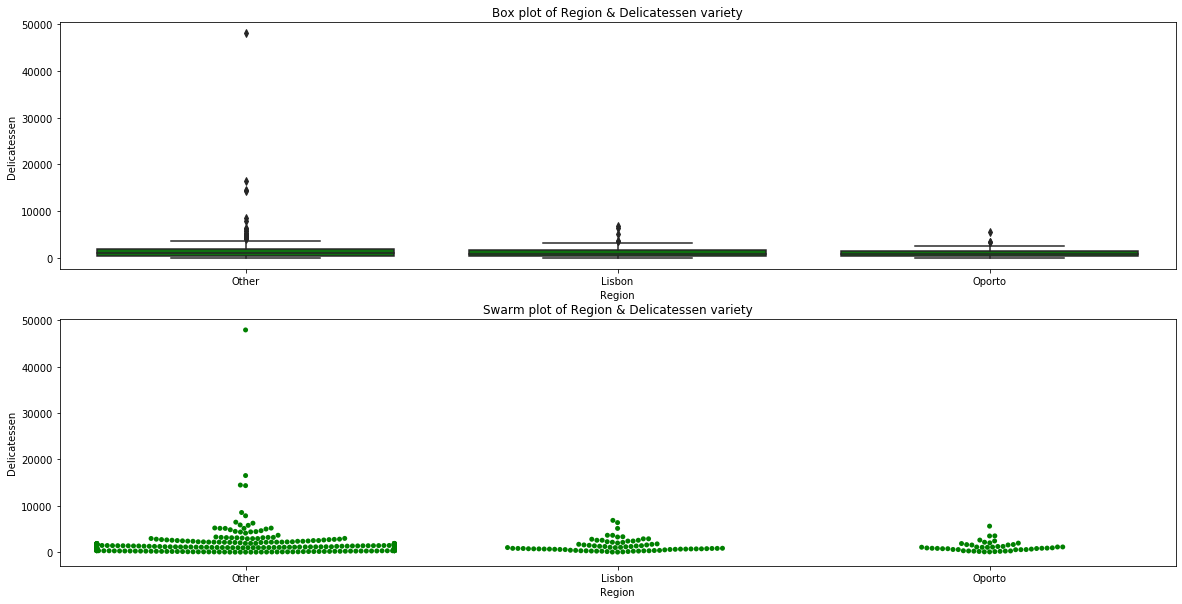

In [38]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Region & Delicatessen variety"
plt.subplot(2,1,1)
sns.boxplot(x="Region",y= "Delicatessen",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Region & Delicatessen variety"
sns.swarmplot(x="Region",y= "Delicatessen",data =df ,color='green').set(title =swarm_plot_title);


In [39]:
df_Hotel=df[df["Channel"]=='Hotel']
df_Retail=df[df["Channel"]=='Retail']

In [45]:
df_Hotel_summ=pd.DataFrame(df_Hotel.describe().round(2))
df_Hotel_summ.loc["CV"]= CV_row(df_Hotel)
df_Hotel_summ.loc["Skew"]= Skew_row(df_Hotel)
df_Hotel_summ

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,298.00,298.00,298.00,298.00,298.00,298.00
mean,13475.56,3451.72,3962.14,3748.25,790.56,1415.96
std,13831.69,4352.17,3545.51,5643.91,1104.09,3147.43
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,4070.25,1164.50,1703.75,830.00,183.25,379.00
50%,9581.50,2157.00,2684.00,2057.50,385.50,821.00
75%,18274.75,4029.50,5076.75,4558.75,899.50,1548.00
max,112151.00,43950.00,21042.00,60869.00,6907.00,47943.00
CV,1.02,1.26,0.89,1.50,1.39,2.22
Skew,2.51,4.66,2.12,5.21,2.86,11.52


In [46]:
df_Retail_summ=pd.DataFrame(df_Retail.describe().round(2))
df_Retail_summ.loc["CV"]= CV_row(df_Retail)
df_Retail_summ.loc["Skew"]= Skew_row(df_Retail)
df_Retail_summ

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,142.00,142.00,142.00,142.00,142.00,142.00
mean,8904.32,10716.50,16322.85,1652.61,7269.51,1753.44
std,8987.71,9679.63,12267.32,1812.80,6291.09,1953.80
min,18.00,928.00,2743.00,33.00,332.00,3.00
25%,2347.75,5938.00,9245.25,534.25,3683.50,566.75
50%,5993.50,7812.00,12390.00,1081.00,5614.50,1350.00
75%,12229.75,12162.75,20183.50,2146.75,8662.50,2156.00
max,44466.00,73498.00,92780.00,11559.00,40827.00,16523.00
CV,1.01,0.90,0.75,1.09,0.86,1.11
Skew,1.59,3.41,2.98,2.53,2.61,3.77


In [47]:
# renaming the cols and adding suffix
col_name=[]
col_name=new_col_name(df_Hotel_summ,"_Hotel")    
df_Hotel_summ.columns =   col_name  
col_name=new_col_name(df_Retail_summ,"_Retail")    
df_Retail_summ.columns =   col_name  
df_Hotel_summ

,Fresh_Hotel,Milk_Hotel,Grocery_Hotel,Frozen_Hotel,Detergents_Paper_Hotel,Delicatessen_Hotel
count,298.00,298.00,298.00,298.00,298.00,298.00
mean,13475.56,3451.72,3962.14,3748.25,790.56,1415.96
std,13831.69,4352.17,3545.51,5643.91,1104.09,3147.43
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,4070.25,1164.50,1703.75,830.00,183.25,379.00
50%,9581.50,2157.00,2684.00,2057.50,385.50,821.00
75%,18274.75,4029.50,5076.75,4558.75,899.50,1548.00
max,112151.00,43950.00,21042.00,60869.00,6907.00,47943.00
CV,1.02,1.26,0.89,1.50,1.39,2.22
Skew,2.51,4.66,2.12,5.21,2.86,11.52


In [48]:
df_Channelwise_Fresh_summ=pd.concat((df_Hotel_summ["Fresh_Hotel"],df_Retail_summ["Fresh_Retail"]),axis=1,sort=False)
df_Channelwise_Fresh_summ

,Fresh_Hotel,Fresh_Retail
count,298.00,142.00
mean,13475.56,8904.32
std,13831.69,8987.71
min,3.00,18.00
25%,4070.25,2347.75
50%,9581.50,5993.50
75%,18274.75,12229.75
max,112151.00,44466.00
CV,1.02,1.01
Skew,2.51,1.59


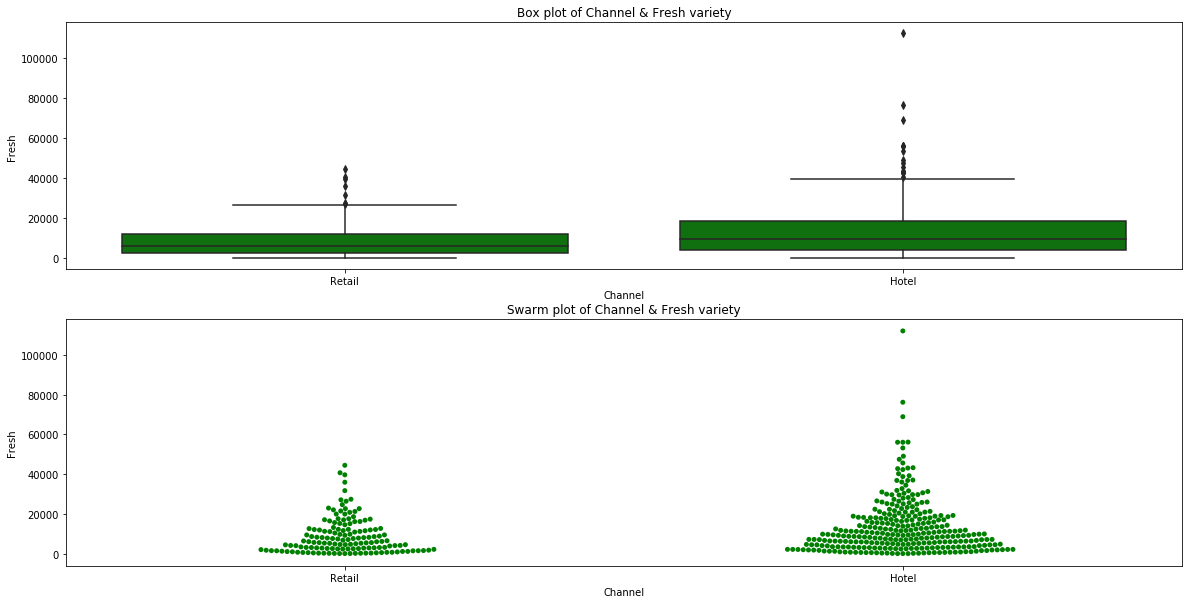

In [49]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Channel & Fresh variety"
plt.subplot(2,1,1)
sns.boxplot(x="Channel",y= "Fresh",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Channel & Fresh variety"
sns.swarmplot(x="Channel",y= "Fresh",data =df ,color='green').set(title =swarm_plot_title);


In [50]:
df_Channelwise_Milk_summ=pd.concat((df_Hotel_summ["Milk_Hotel"],df_Retail_summ["Milk_Retail"]),axis=1,sort=False)
df_Channelwise_Milk_summ

,Milk_Hotel,Milk_Retail
count,298.00,142.00
mean,3451.72,10716.50
std,4352.17,9679.63
min,55.00,928.00
25%,1164.50,5938.00
50%,2157.00,7812.00
75%,4029.50,12162.75
max,43950.00,73498.00
CV,1.26,0.90
Skew,4.66,3.41


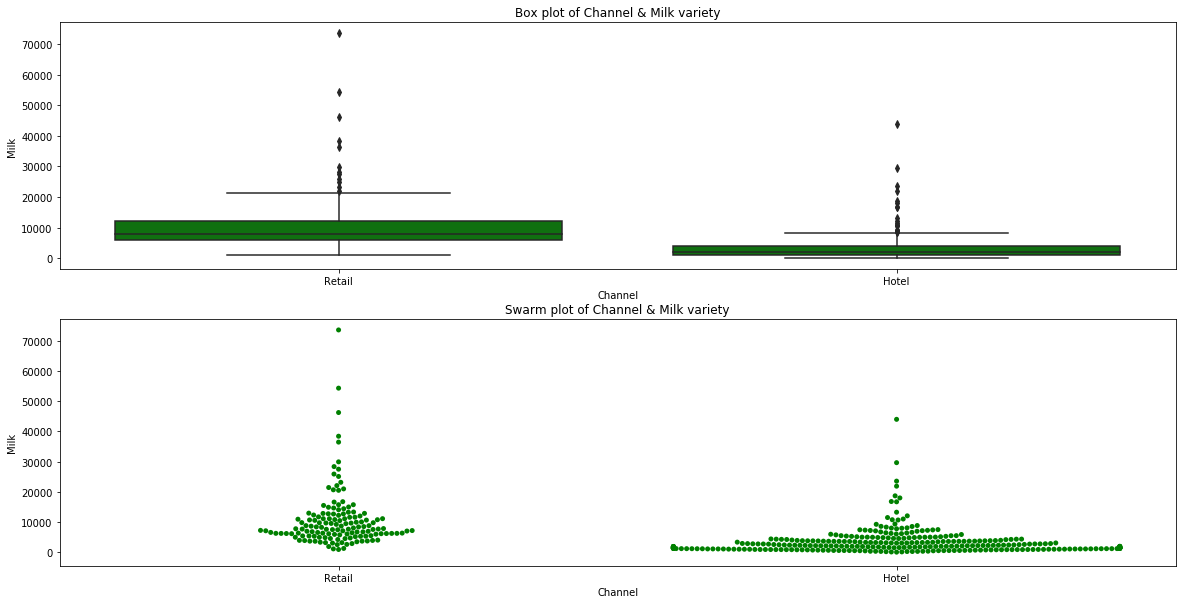

In [51]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Channel & Milk variety"
plt.subplot(2,1,1)
sns.boxplot(x="Channel",y= "Milk",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Channel & Milk variety"
sns.swarmplot(x="Channel",y= "Milk",data =df ,color='green').set(title =swarm_plot_title);

In [52]:
df_Channelwise_Grocery_summ=pd.concat((df_Hotel_summ["Grocery_Hotel"],df_Retail_summ["Grocery_Retail"]),axis=1,sort=False)
df_Channelwise_Grocery_summ

,Grocery_Hotel,Grocery_Retail
count,298.00,142.00
mean,3962.14,16322.85
std,3545.51,12267.32
min,3.00,2743.00
25%,1703.75,9245.25
50%,2684.00,12390.00
75%,5076.75,20183.50
max,21042.00,92780.00
CV,0.89,0.75
Skew,2.12,2.98


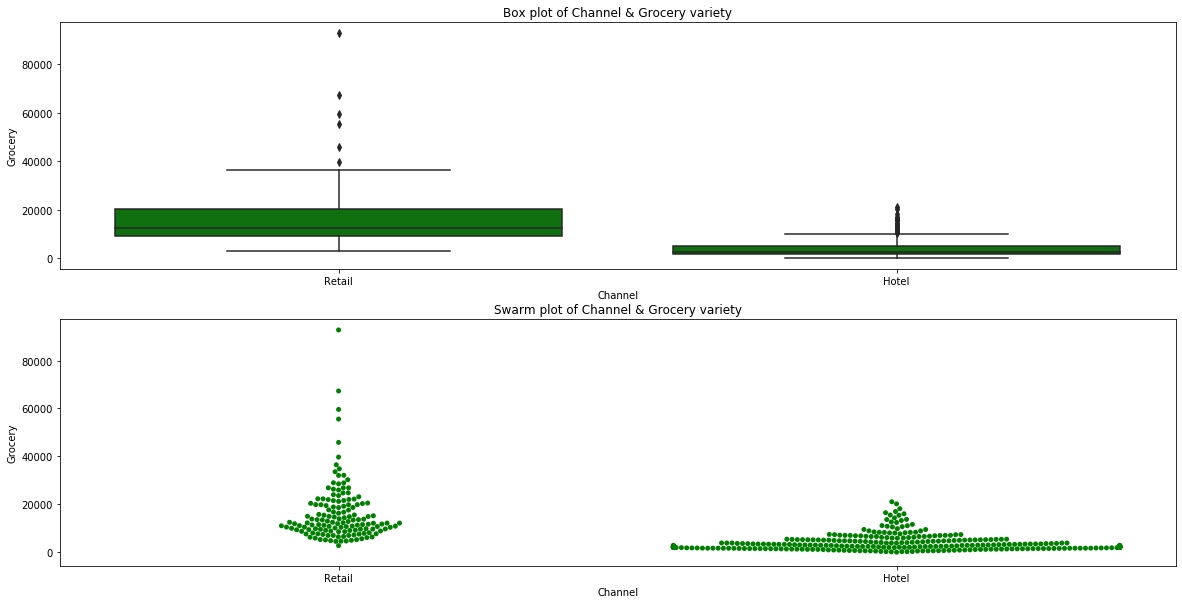

In [53]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Channel & Grocery variety"
plt.subplot(2,1,1)
sns.boxplot(x="Channel",y= "Grocery",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Channel & Grocery variety"
sns.swarmplot(x="Channel",y= "Grocery",data =df ,color='green').set(title =swarm_plot_title);

In [54]:
df_Channelwise_Frozen_summ=pd.concat((df_Hotel_summ["Frozen_Hotel"],df_Retail_summ["Frozen_Retail"]),axis=1,sort=False)
df_Channelwise_Frozen_summ

,Frozen_Hotel,Frozen_Retail
count,298.00,142.00
mean,3748.25,1652.61
std,5643.91,1812.80
min,25.00,33.00
25%,830.00,534.25
50%,2057.50,1081.00
75%,4558.75,2146.75
max,60869.00,11559.00
CV,1.50,1.09
Skew,5.21,2.53


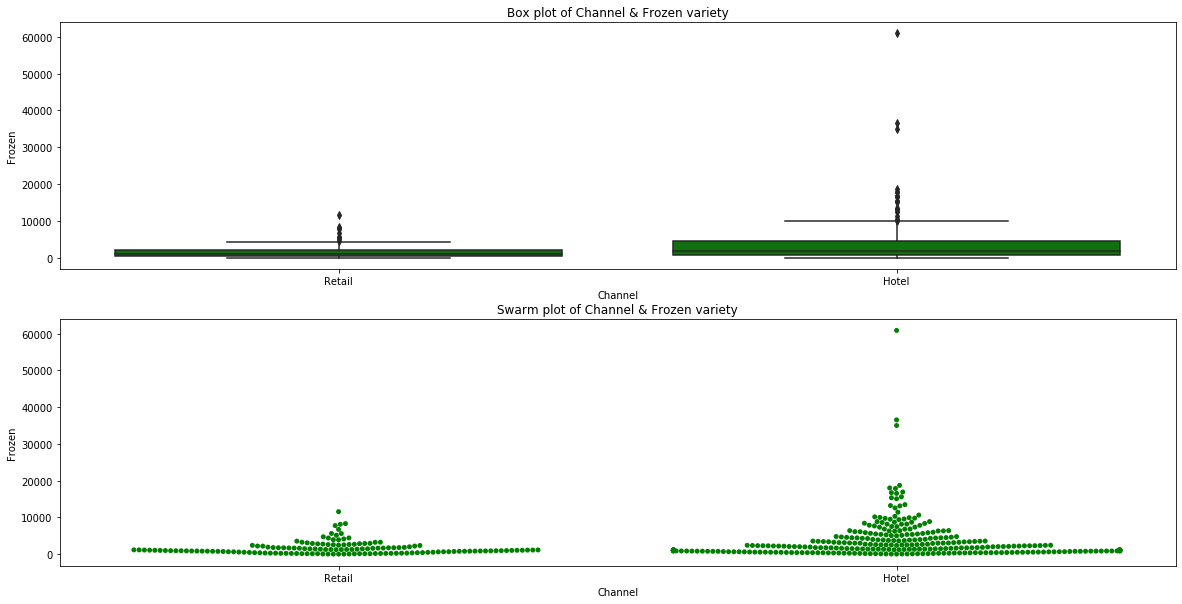

In [55]:

plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Channel & Frozen variety"
plt.subplot(2,1,1)
sns.boxplot(x="Channel",y= "Frozen",data =df ,color='green').set(title=box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Channel & Frozen variety"
sns.swarmplot(x="Channel",y= "Frozen",data =df ,color='green').set(title=swarm_plot_title);

In [56]:
df_Channelwise_Detergents_Paper_summ=pd.concat((df_Hotel_summ["Detergents_Paper_Hotel"],df_Retail_summ["Detergents_Paper_Retail"]),axis=1,sort=False)
df_Channelwise_Detergents_Paper_summ

,Detergents_Paper_Hotel,Detergents_Paper_Retail
count,298.00,142.00
mean,790.56,7269.51
std,1104.09,6291.09
min,3.00,332.00
25%,183.25,3683.50
50%,385.50,5614.50
75%,899.50,8662.50
max,6907.00,40827.00
CV,1.39,0.86
Skew,2.86,2.61


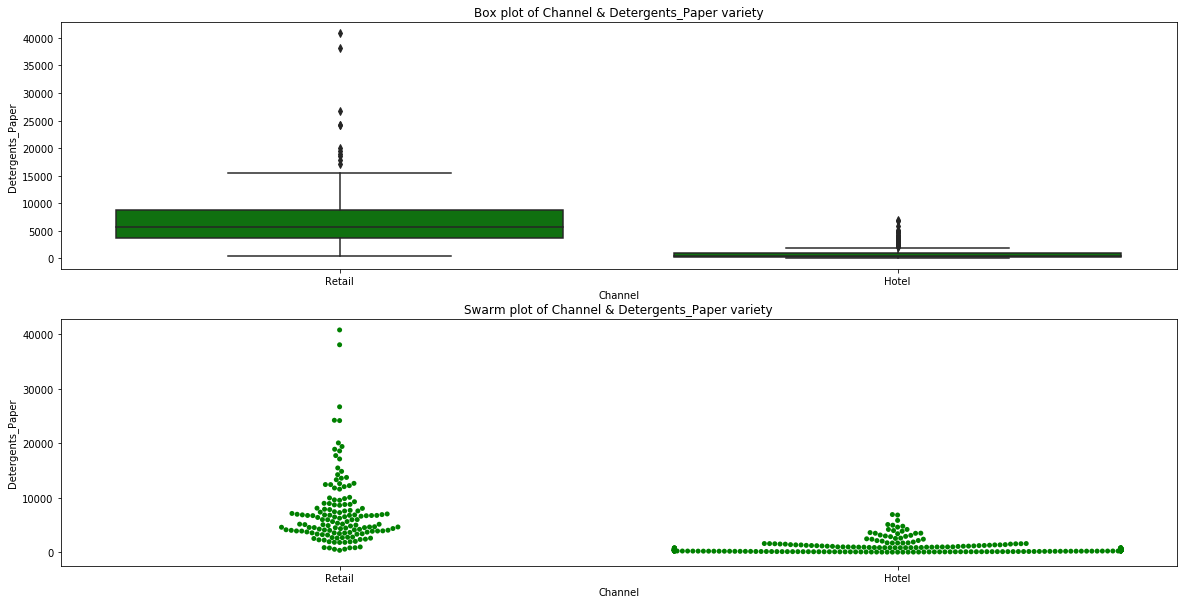

In [57]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Channel & Detergents_Paper variety"
plt.subplot(2,1,1)
sns.boxplot(x="Channel",y= "Detergents_Paper",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Channel & Detergents_Paper variety"
sns.swarmplot(x="Channel",y= "Detergents_Paper",data =df ,color='green').set(title =swarm_plot_title);


In [58]:
df_Channelwise_Delicatessen_summ=pd.concat((df_Hotel_summ["Delicatessen_Hotel"],df_Retail_summ["Delicatessen_Retail"]),axis=1,sort=False)
df_Channelwise_Delicatessen_summ

,Delicatessen_Hotel,Delicatessen_Retail
count,298.00,142.00
mean,1415.96,1753.44
std,3147.43,1953.80
min,3.00,3.00
25%,379.00,566.75
50%,821.00,1350.00
75%,1548.00,2156.00
max,47943.00,16523.00
CV,2.22,1.11
Skew,11.52,3.77


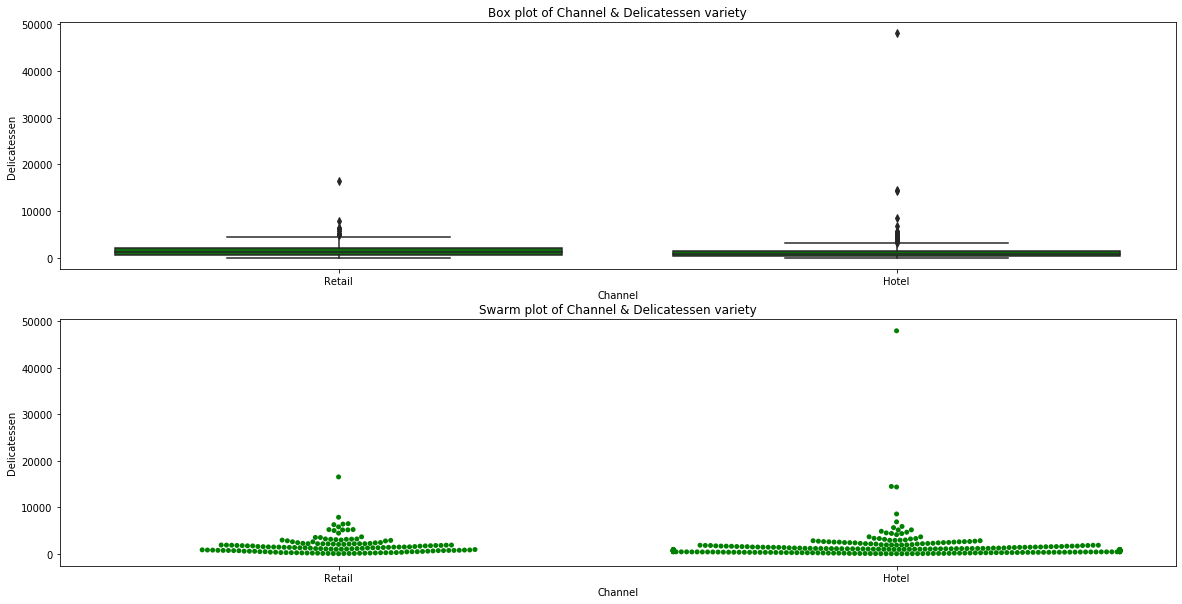

In [59]:

plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Channel & Delicatessen variety"
plt.subplot(2,1,1)
sns.boxplot(x="Channel",y= "Delicatessen",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Channel & Delicatessen variety"
sns.swarmplot(x="Channel",y= "Delicatessen",data =df ,color='green').set(title =swarm_plot_title);

### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?
### Solution:

In [61]:
dfc=df.copy()
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spend
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [62]:
# dropping cols for which behaviour is not required
dfc.drop('Total_Spend',axis=1,inplace=True)
dfc.drop('Buyer/Spender',axis=1,inplace=True)
df_summ=pd.DataFrame(dfc.describe().round(2))
df_summ.loc["CV"]= CV_row(dfc)
#df_summ.loc["Skew"]= Skew_row(dfc)
df_summ

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00
mean,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00
CV,1.05,1.27,1.19,1.58,1.65,1.85


As seen above, item which is showing most inconsistent behaviour is 'Delicatessen' and item which is showing lowest inconsistent behaviour is 'Fresh'

## 1.4 Are there any outliers in the data?
### Solution:

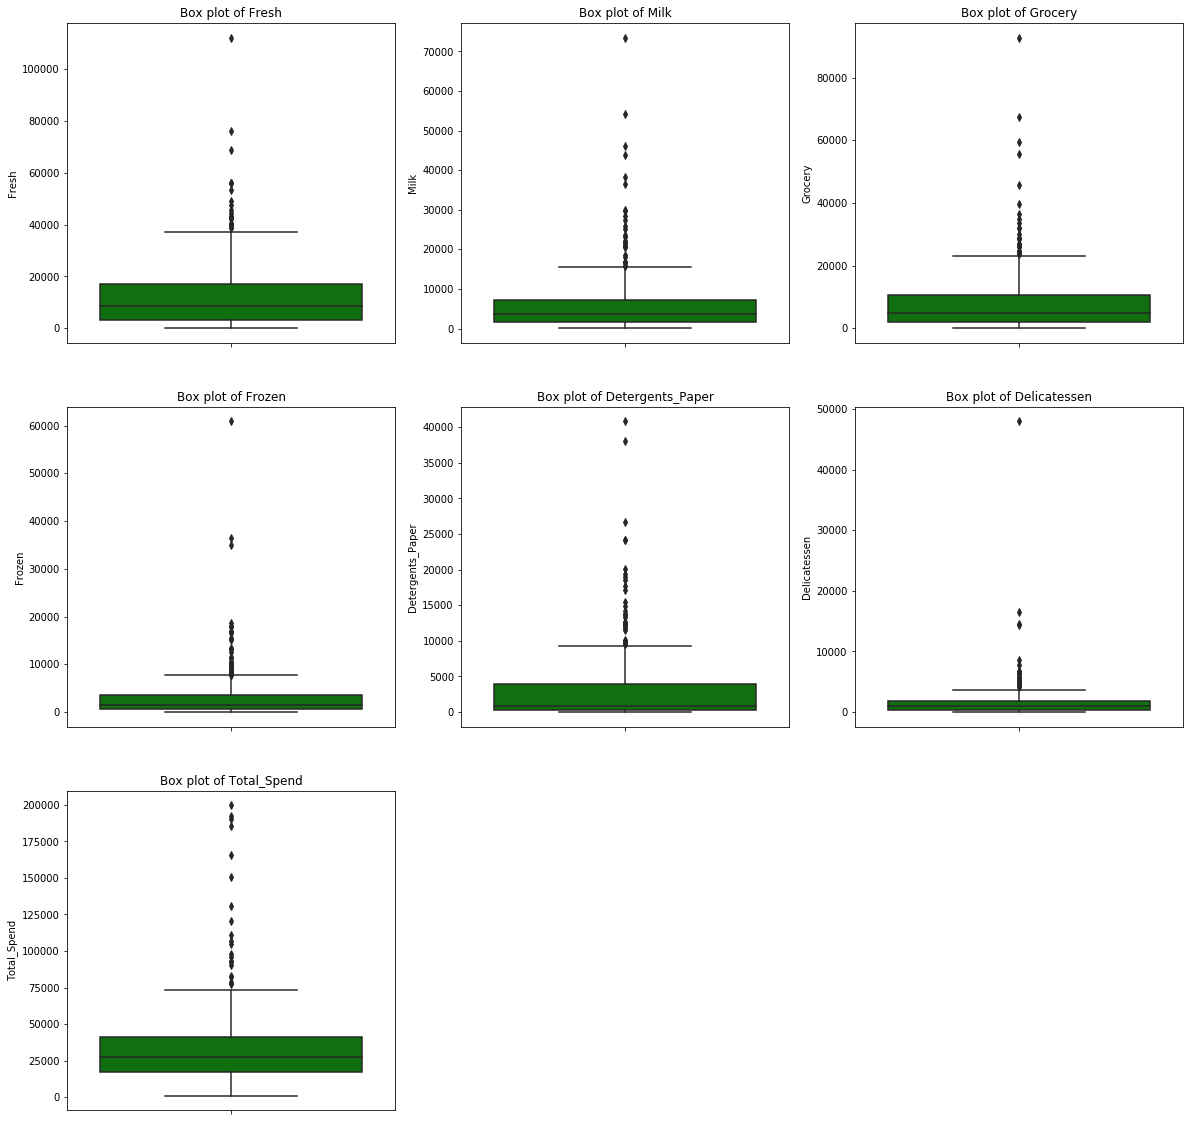

In [63]:
# Checking for Outliers
plt.figure(figsize= (20,20))
box_plot_no=1
for col in df.columns :
    if (col != 'Channel') and (col != 'Region') and (col != 'Buyer/Spender'):
        box_plot_title = "Box plot of " + col
        plt.subplot(3,3,box_plot_no)
        sns.boxplot(x= col,data =df ,color='green', orient = 'v').set(title =box_plot_title)
        box_plot_no = box_plot_no + 1 


As evident from above box plots, all attributes have outliers. All outliers are on maximum side i.e. there are few retailers which are spending much more than the majority of the retailers. Data appears to be right skewed

### 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective
### Solution:

In [64]:
# checking Region and channel counts
pd.crosstab(df["Region"],df["Channel"],margins=True)

Channel,Hotel,Retail,All
Region,,,
Lisbon,59,18,77
Oporto,28,19,47
Other,211,105,316
All,298,142,440


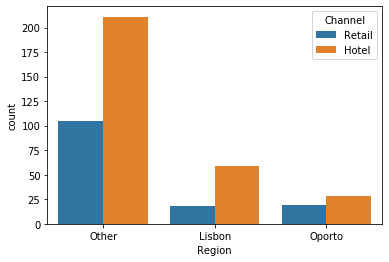

In [65]:
sns.countplot(x='Region' , hue='Channel',data=df);

It means that around 75% of data has region as 'Other' i.e. region of most of the spenders is unknown. Another thing to notice here is that 67% of buyers are spending via 'Hotel' channel

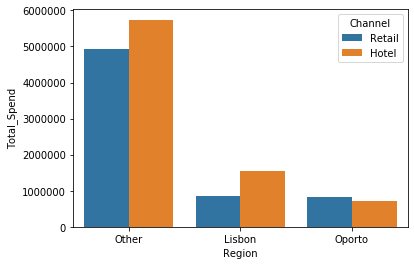

In [66]:
sns.barplot(x='Region', y ='Total_Spend' , hue='Channel',data=df,estimator=sum, ci=False );


Now since other region hotel channel has the highest no of spenders , this is most spending region and channel for the wholesaler. Further Oporto region has lower no of spenders under retail channel but total spending is higher than Hotel channel. It means in Oporto buyers are spending more money under Retail channel.

In [67]:
# checking correlation
corr = dfc.corr()
corr

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


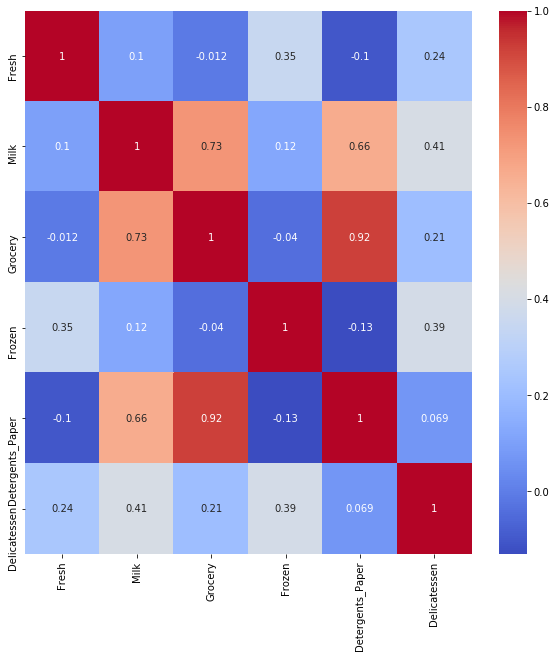

In [69]:
# plotting a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm') 
plt.show()

As seen in heatmap, Grocery and Detergent_Paper have a very strong correlation. Grocery and Milk also has strong correlation. Frozen + Detergent_Paper & Detergent_paper + Fresh have negative correlation.

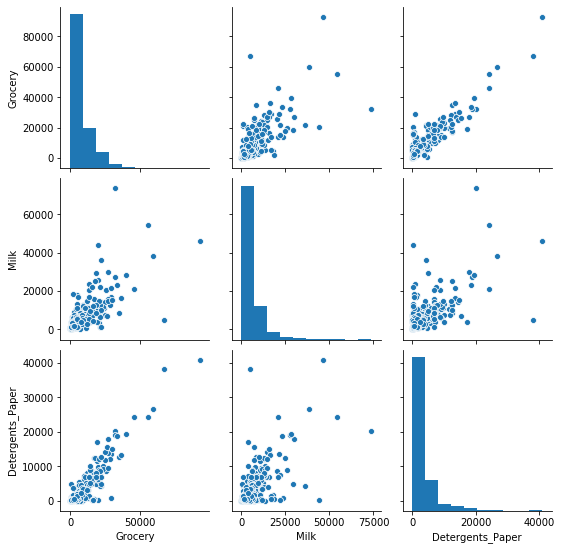

In [70]:
sns.pairplot(dfc[["Grocery","Milk","Detergents_Paper"]]);

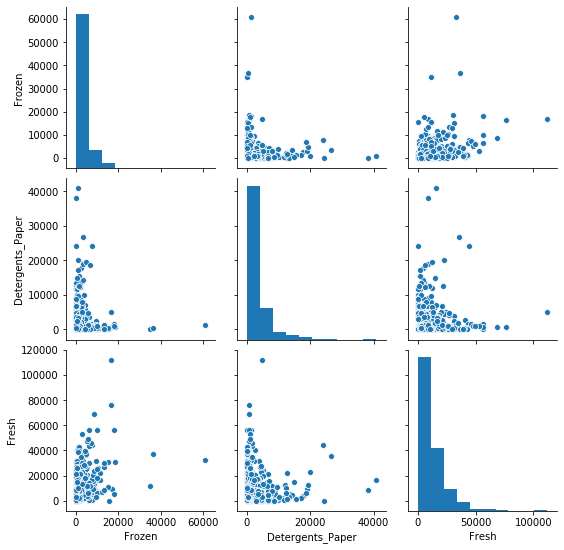

In [71]:
sns.pairplot(dfc[["Frozen","Detergents_Paper","Fresh"]]);

In [72]:
dfd=pd.DataFrame(pd.pivot_table(df,index=['Region','Channel'],aggfunc=sum,margins=True))
dfd.sort_values(by='Total_Spend',inplace=True,ascending=False)
dfd


Buyer/Spender  Delicatessen  Detergents_Paper    Fresh  \
Region Channel                                                           
All                     97020        670943           1267857  5280131   
Other  Hotel            48020        320358            165990  2928269   
       Retail           16006        191752            724420  1032308   
Lisbon Hotel            14026         70632             56081   761233   
       Retail            4069         33695            148055    93600   
Oporto Retail            5911         23541            159795   138506   
       Hotel             8988         30965             13516   326215   

                 Frozen  Grocery     Milk  Total_Spend  
Region Channel                                          
All             1351650  3498562  2550357     14619500  
Other  Hotel     771606   820101   735753      5742077  
       Retail    158886  1675150  1153006      4935522  
Lisbon Hotel     184512   237542   228342      1538342  
       Retail     46514   332495   194112       848471  
Oporto Retail     29271   310200   174625       835938  
       Hotel     160861   123074    64519       719150

In [73]:
dfd=pd.DataFrame(pd.pivot_table(df,index=['Channel'],aggfunc=sum,margins=True))
dfd

,Buyer/Spender,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total_Spend
Channel,,,,,,,,
Hotel,71034,421955,235587,4015717,1116979,1180717,1028614,7999569
Retail,25986,248988,1032270,1264414,234671,2317845,1521743,6619931
All,97020,670943,1267857,5280131,1351650,3498562,2550357,14619500


In [74]:
dfd=pd.DataFrame(pd.pivot_table(df,index=['Channel'],aggfunc=np.median))
dfd

,Buyer/Spender,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total_Spend
Channel,,,,,,,,
Hotel,241.5,821,385.5,9581.5,2057.5,2684,2157,21254.5
Retail,166.5,1350,5614.5,5993.5,1081.0,12390,7812,37139.0


# Problem 2

In [2]:
df = pd.read_csv('Education - Post 12th Standard (1).csv')

In [5]:
df.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
df.tail()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
776,York College of Pennsylvania,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [8]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [9]:
df.mean()

Apps            3001.638353
Accept          2018.804376
Enroll           779.972973
Top10perc         27.558559
Top25perc         55.796654
F.Undergrad     3699.907336
P.Undergrad      855.298584
Outstate       10440.669241
Room.Board      4357.526384
Books            549.380952
Personal        1340.642214
PhD               72.660232
Terminal          79.702703
S.F.Ratio         14.089704
perc.alumni       22.743887
Expend          9660.171171
Grad.Rate         65.463320
dtype: float64

In [10]:
#5 Point summary Median,IQR,Range,Q1,Q3
df.median()

Apps           1558.0
Accept         1110.0
Enroll          434.0
Top10perc        23.0
Top25perc        54.0
F.Undergrad    1707.0
P.Undergrad     353.0
Outstate       9990.0
Room.Board     4200.0
Books           500.0
Personal       1200.0
PhD              75.0
Terminal         82.0
S.F.Ratio        13.6
perc.alumni      21.0
Expend         8377.0
Grad.Rate        65.0
dtype: float64

In [11]:
#IQR
df.quantile(0.75)-df.quantile(0.25)

Apps           2848.0
Accept         1820.0
Enroll          660.0
Top10perc        20.0
Top25perc        28.0
F.Undergrad    3013.0
P.Undergrad     872.0
Outstate       5605.0
Room.Board     1453.0
Books           130.0
Personal        850.0
PhD              23.0
Terminal         21.0
S.F.Ratio         5.0
perc.alumni      18.0
Expend         4079.0
Grad.Rate        25.0
dtype: float64

In [12]:
#Range
df.max(numeric_only=True)-df.min(numeric_only=True)

Apps           48013.0
Accept         26258.0
Enroll          6357.0
Top10perc         95.0
Top25perc         91.0
F.Undergrad    31504.0
P.Undergrad    21835.0
Outstate       19360.0
Room.Board      6344.0
Books           2244.0
Personal        6550.0
PhD               95.0
Terminal          76.0
S.F.Ratio         37.3
perc.alumni       64.0
Expend         53047.0
Grad.Rate        108.0
dtype: float64

In [13]:
df.std()

Apps           3870.201484
Accept         2451.113971
Enroll          929.176190
Top10perc        17.640364
Top25perc        19.804778
F.Undergrad    4850.420531
P.Undergrad    1522.431887
Outstate       4023.016484
Room.Board     1096.696416
Books           165.105360
Personal        677.071454
PhD              16.328155
Terminal         14.722359
S.F.Ratio         3.958349
perc.alumni      12.391801
Expend         5221.768440
Grad.Rate        17.177710
dtype: float64

In [14]:
df.var()

Apps           1.497846e+07
Accept         6.007960e+06
Enroll         8.633684e+05
Top10perc      3.111825e+02
Top25perc      3.922292e+02
F.Undergrad    2.352658e+07
P.Undergrad    2.317799e+06
Outstate       1.618466e+07
Room.Board     1.202743e+06
Books          2.725978e+04
Personal       4.584258e+05
PhD            2.666086e+02
Terminal       2.167478e+02
S.F.Ratio      1.566853e+01
perc.alumni    1.535567e+02
Expend         2.726687e+07
Grad.Rate      2.950737e+02
dtype: float64

In [15]:
df.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


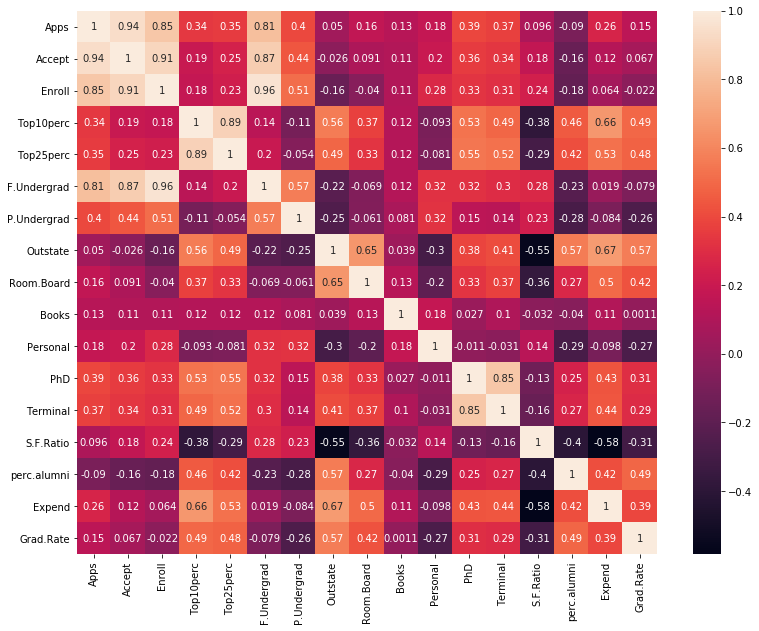

In [16]:
plt.subplots(figsize=(13,10))
sns.heatmap(df.corr(),annot=True)

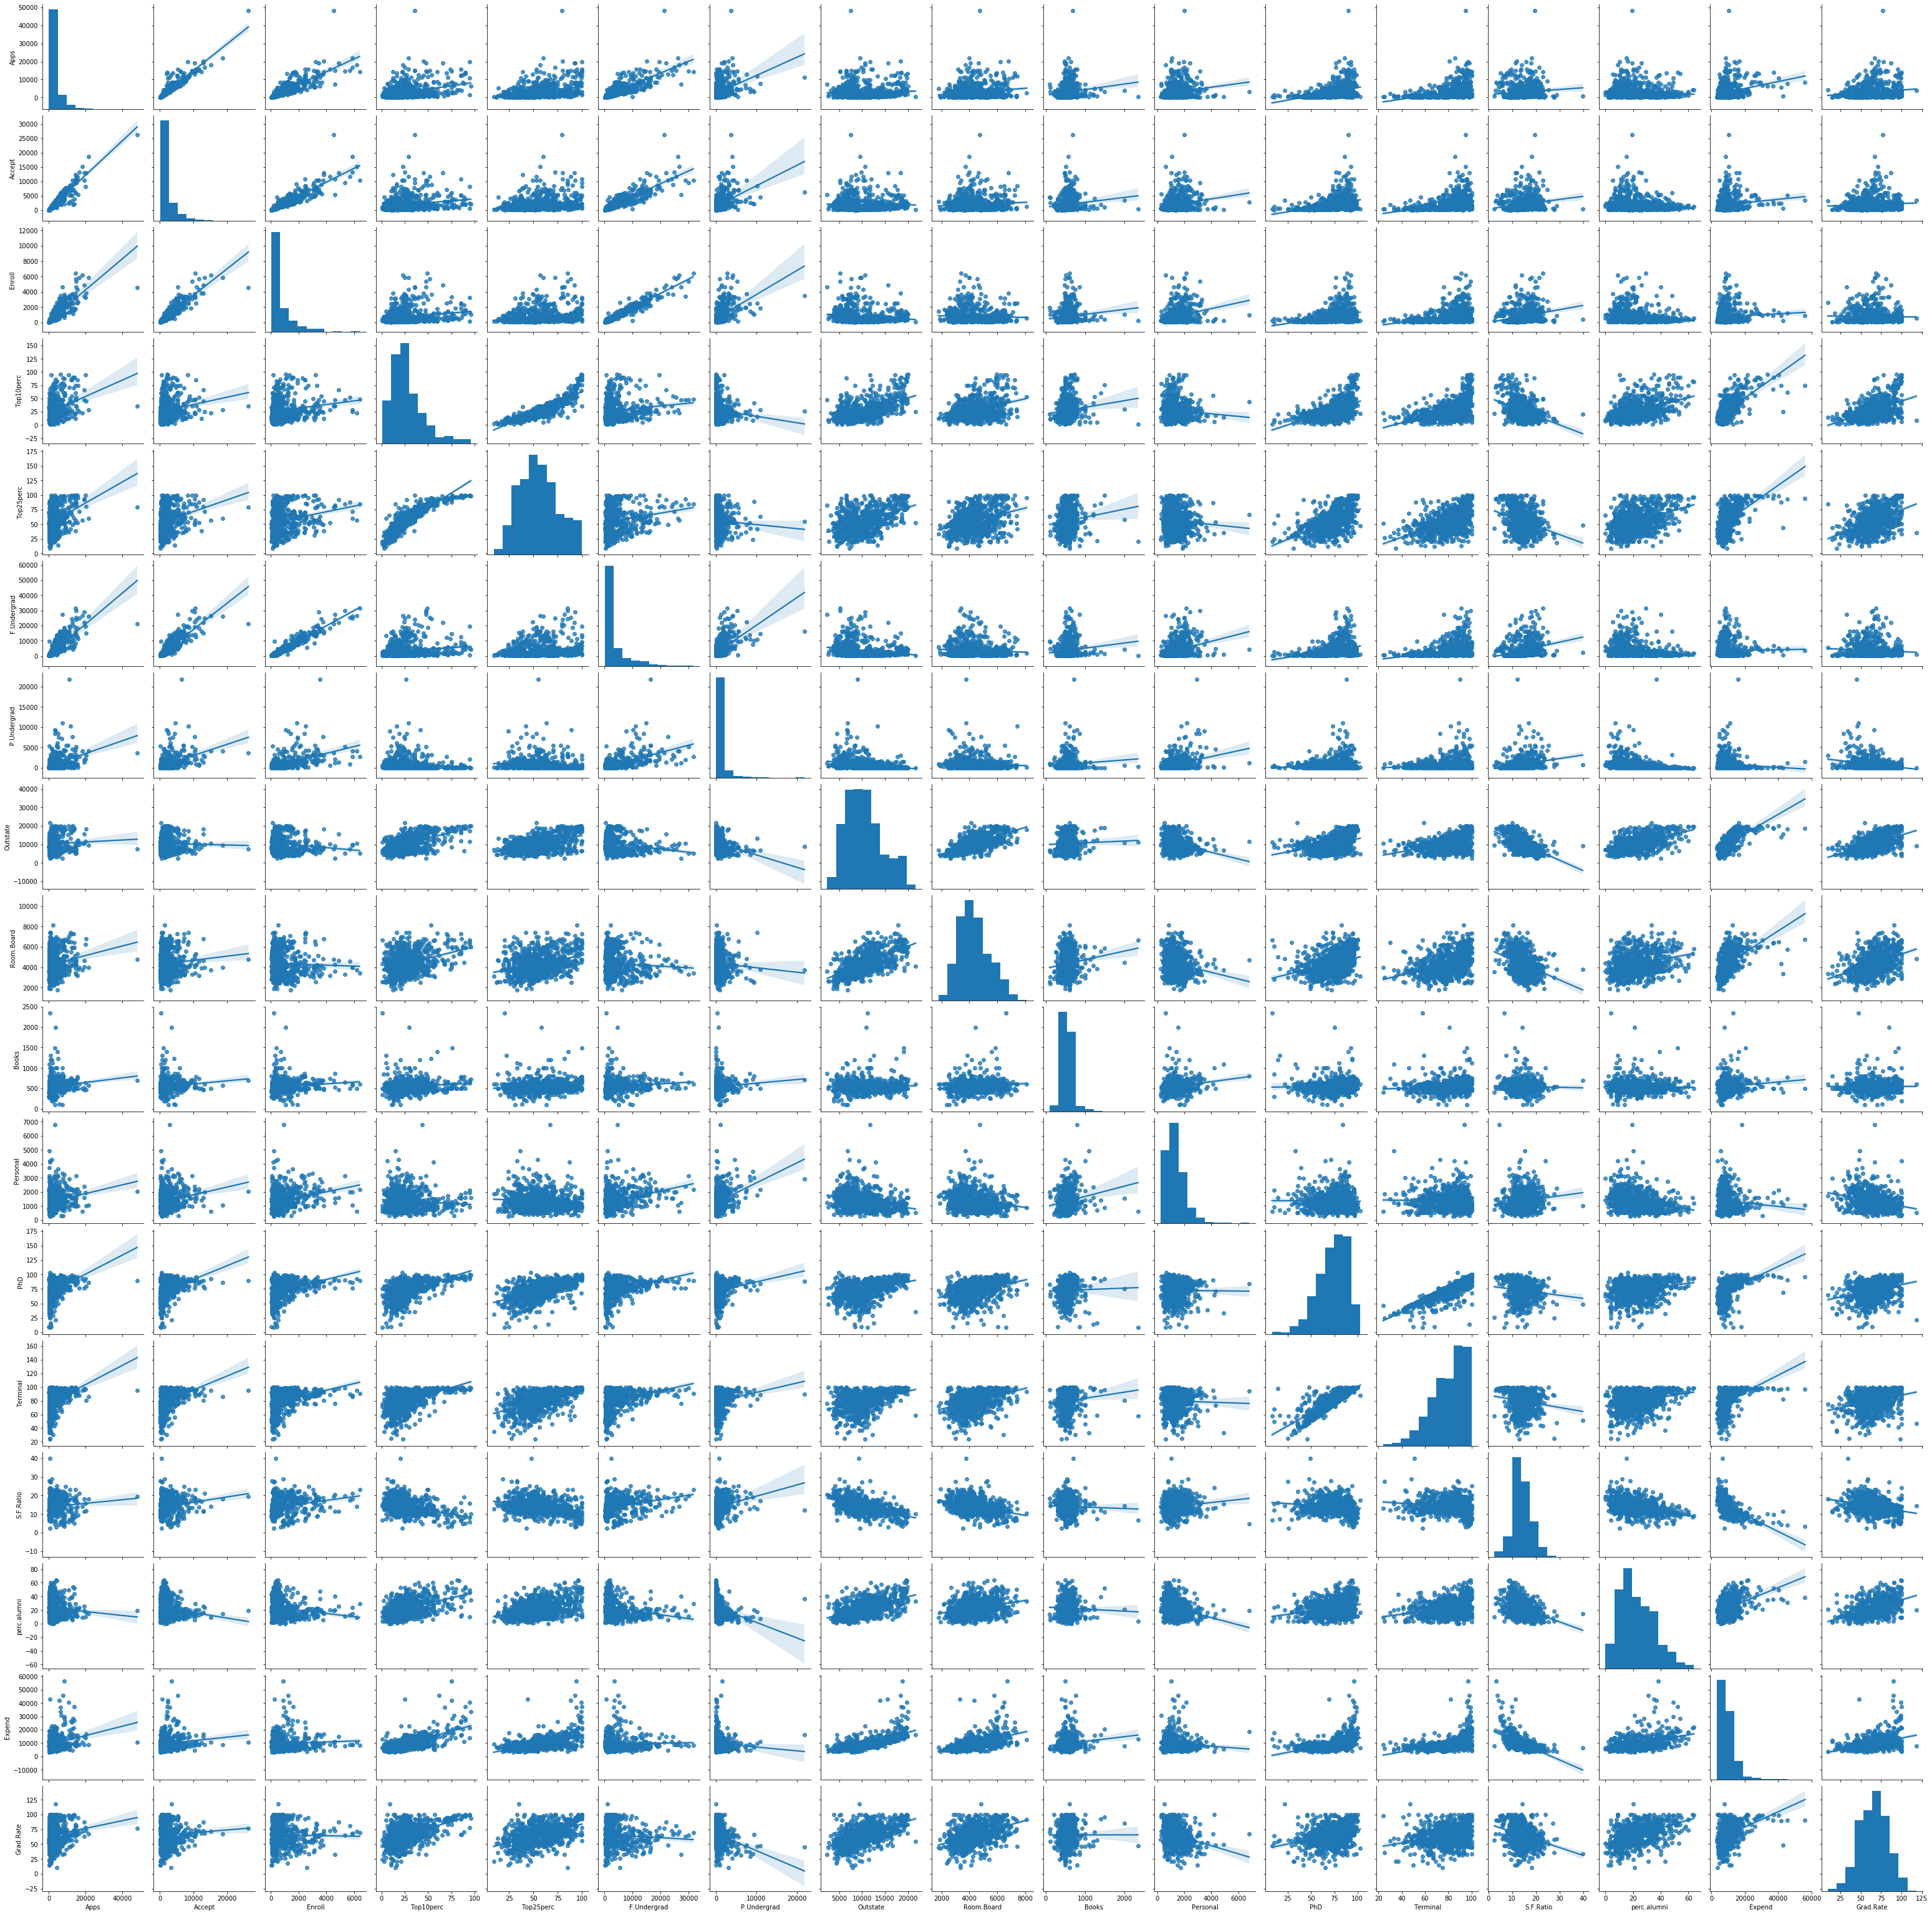

In [3]:
sns.pairplot(df,kind='reg')

In [4]:
dupes=df.duplicated()
sum(dupes)

0

In [5]:
IQR=df.quantile(0.75)-df.quantile(0.25)

In [6]:
out=((df.iloc[:,1:]<(df.quantile(0.25)-1.5*IQR)) | (df.iloc[:,1:]>(df.quantile(0.75)+1.5*IQR))).sum()
out

Apps           70
Accept         73
Enroll         79
Top10perc      39
Top25perc       0
F.Undergrad    97
P.Undergrad    67
Outstate        1
Room.Board      7
Books          46
Personal       20
PhD             8
Terminal        8
S.F.Ratio      12
perc.alumni     5
Expend         48
Grad.Rate       4
dtype: int64

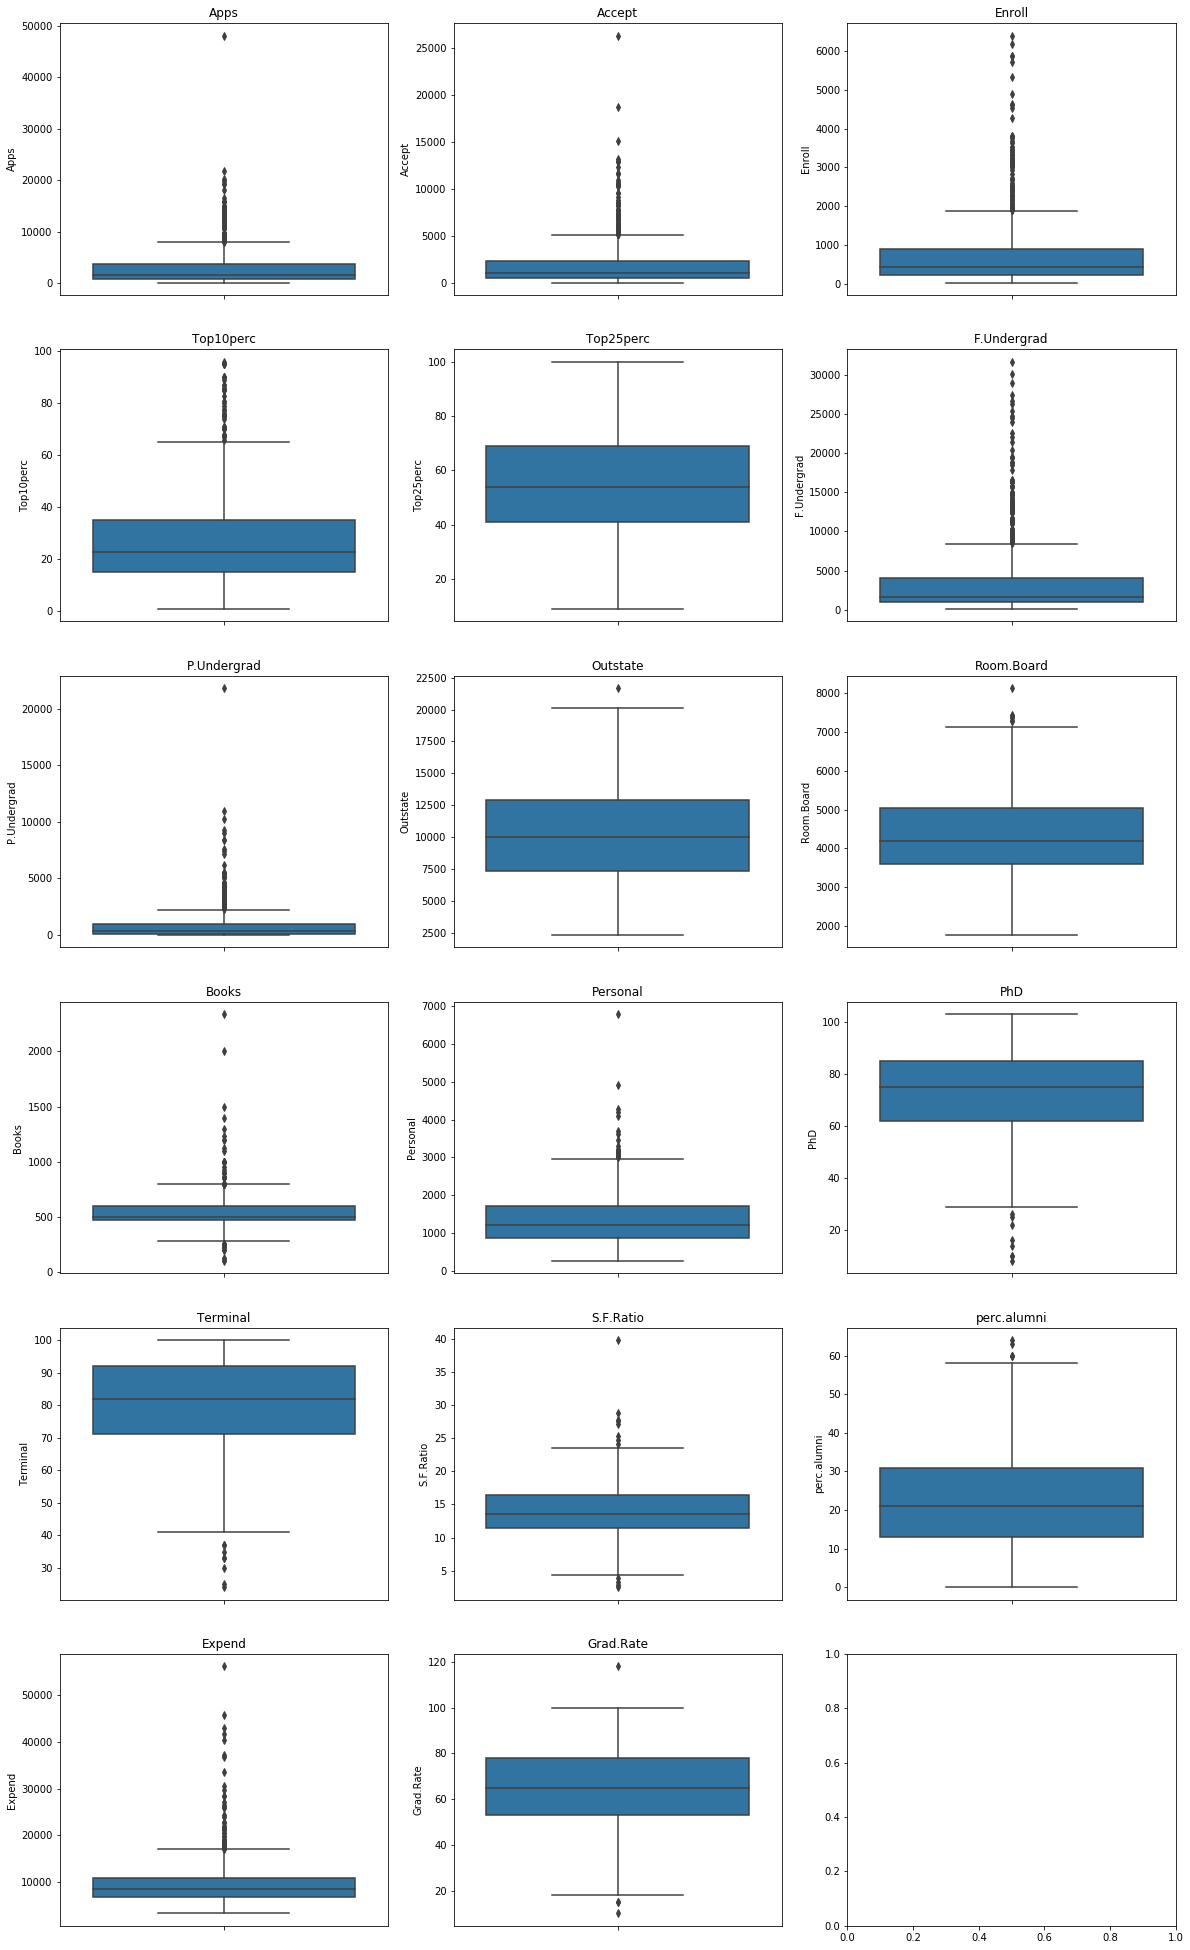

In [7]:
fig,ax=plt.subplots(nrows=6,ncols=3,sharey=False,sharex=False,figsize=(20,35))
sns.boxplot(x=df['Apps'],orient='v',ax=ax[0,0])
ax[0,0].title.set_text('Apps')
sns.boxplot(x=df['Accept'],orient='v',ax=ax[0,1])
ax[0,1].title.set_text('Accept')
sns.boxplot(x=df['Enroll'],orient='v',ax=ax[0,2])
ax[0,2].title.set_text('Enroll')
sns.boxplot(x=df['Top10perc'],orient='v',ax=ax[1,0])
ax[1,0].title.set_text('Top10perc')
sns.boxplot(x=df['Top25perc'],orient='v',ax=ax[1,1])
ax[1,1].title.set_text('Top25perc')
sns.boxplot(x=df['F.Undergrad'],orient='v',ax=ax[1,2])
ax[1,2].title.set_text('F.Undergrad')
sns.boxplot(x=df['P.Undergrad'],orient='v',ax=ax[2,0])
ax[2,0].title.set_text('P.Undergrad')
sns.boxplot(x=df['Outstate'],orient='v',ax=ax[2,1])
ax[2,1].title.set_text('Outstate')
sns.boxplot(x=df['Room.Board'],orient='v',ax=ax[2,2])
ax[2,2].title.set_text('Room.Board')
sns.boxplot(x=df['Books'],orient='v',ax=ax[3,0])
ax[3,0].title.set_text('Books')
sns.boxplot(x=df['Personal'],orient='v',ax=ax[3,1])
ax[3,1].title.set_text('Personal')
sns.boxplot(x=df['PhD'],orient='v',ax=ax[3,2])
ax[3,2].title.set_text('PhD')
sns.boxplot(x=df['Terminal'],orient='v',ax=ax[4,0])
ax[4,0].title.set_text('Terminal')
sns.boxplot(x=df['S.F.Ratio'],orient='v',ax=ax[4,1])
ax[4,1].title.set_text('S.F.Ratio')
sns.boxplot(x=df['perc.alumni'],orient='v',ax=ax[4,2])
ax[4,2].title.set_text('perc.alumni')
sns.boxplot(x=df['Expend'],orient='v',ax=ax[5,0])
ax[5,0].title.set_text('Expend')
sns.boxplot(x=df['Grad.Rate'],orient='v',ax=ax[5,1])
ax[5,1].title.set_text('Grad.Rate')

[Text(0, 0, 'Abilene Christian University'),
 Text(0, 0, 'Adelphi University'),
 Text(0, 0, 'Adrian College'),
 Text(0, 0, 'Agnes Scott College'),
 Text(0, 0, 'Alaska Pacific University'),
 Text(0, 0, 'Albertson College'),
 Text(0, 0, 'Albertus Magnus College'),
 Text(0, 0, 'Albion College'),
 Text(0, 0, 'Albright College'),
 Text(0, 0, 'Alderson-Broaddus College')]

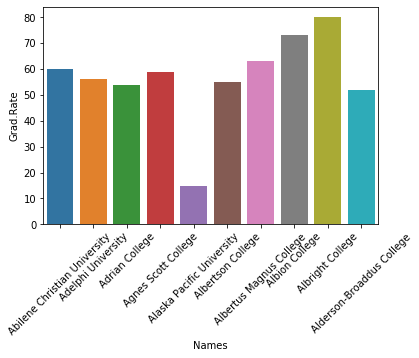

In [8]:
#plt.subplots(figsize=(10,15))
plt1=sns.barplot(x=df.Names.head(10),y='Grad.Rate',data=df)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=45)

[Text(0, 0, 'Winthrop University'),
 Text(0, 0, 'Wisconsin Lutheran College'),
 Text(0, 0, 'Wittenberg University'),
 Text(0, 0, 'Wofford College'),
 Text(0, 0, 'Worcester Polytechnic Institute'),
 Text(0, 0, 'Worcester State College'),
 Text(0, 0, 'Xavier University'),
 Text(0, 0, 'Xavier University of Louisiana'),
 Text(0, 0, 'Yale University'),
 Text(0, 0, 'York College of Pennsylvania')]

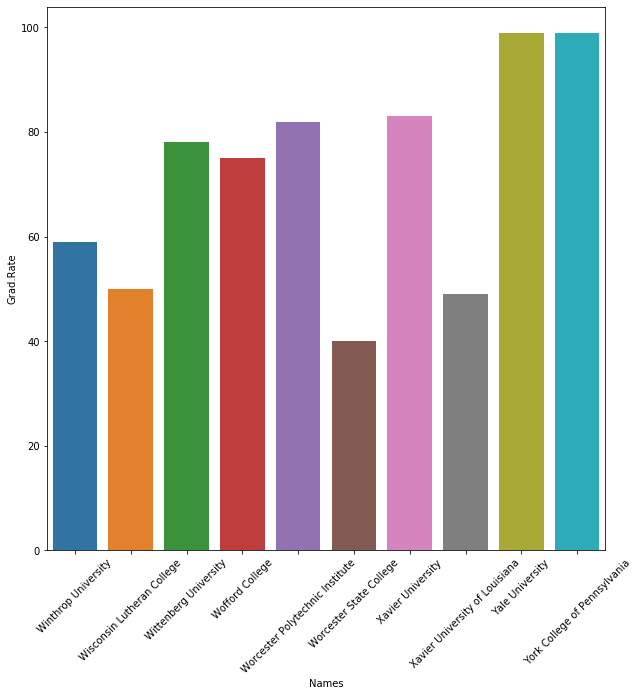

In [9]:
plt.subplots(figsize=(10,10))
plt1=sns.barplot(x=df.Names.tail(10),y='Grad.Rate',data=df)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=45)

[Text(0, 0, 'Worcester State College'),
 Text(0, 0, 'Xavier University'),
 Text(0, 0, 'Xavier University of Louisiana'),
 Text(0, 0, 'Yale University'),
 Text(0, 0, 'York College of Pennsylvania')]

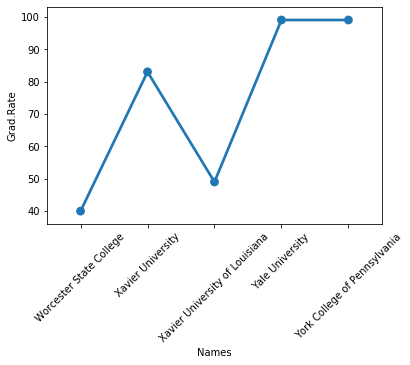

In [10]:
plt1=sns.pointplot(x=df.Names.tail(),y='Grad.Rate',data=df)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=45)